In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


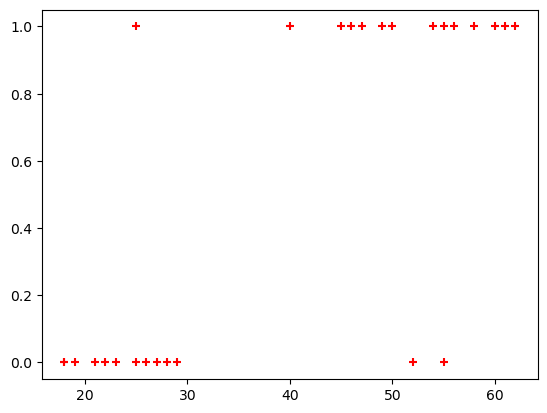

In [3]:
plt.scatter(df['age'], df['bought_insurance'], marker='+', color='red')

In [4]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df[['bought_insurance']], test_size=0.1)

In [7]:
X_test

,age
5,56
3,52
16,25


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
model.predict(X_test)

array([1, 1, 0], dtype=int64)

In [12]:
y_test

,bought_insurance
5,1
3,0
16,1


In [13]:
model.score(X_test, y_test)

0.3333333333333333

In [14]:
model.predict_proba(X_test)

array([[0.03051562, 0.96948438],
       [0.06762919, 0.93237081],
       [0.9530885 , 0.0469115 ]])

### Homework:

In [15]:
df1 = pd.read_csv('HR_comma_sep.csv')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [90]:
df1['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

##### Satisfaction level:

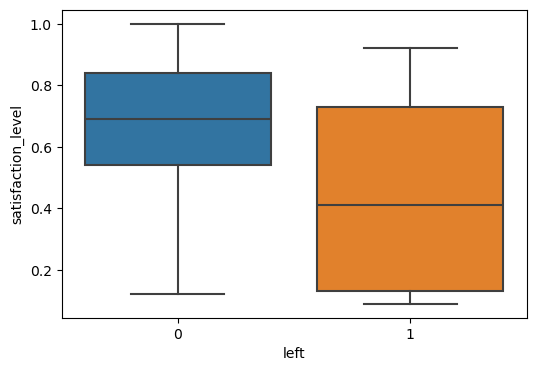

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x=df1['left'], y=df1['satisfaction_level'])

In [16]:
satisfaction_level_summary = df1.groupby('left').agg({'satisfaction_level':'mean'}).reset_index()
satisfaction_level_summary.columns = ['left', 'average_satisfaction_level']
satisfaction_level_summary['left'] = satisfaction_level_summary['left'].replace({0: 'Not Left', 1: 'Left'})
satisfaction_level_summary

,left,average_satisfaction_level
0,Not Left,0.666810
1,Left,0.440098


Text(0, 0.5, 'Average satisfaction level')

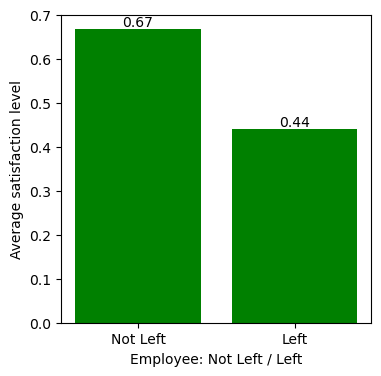

In [48]:
plt.figure(figsize=(4,4))
bars = plt.bar(satisfaction_level_summary['left'], satisfaction_level_summary['average_satisfaction_level'], color='green')
for bar in bars:
    plt.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0),
                 textcoords='offset points')
plt.xlabel('Employee: Not Left / Left')
plt.ylabel('Average satisfaction level')

#### Last evaluation:

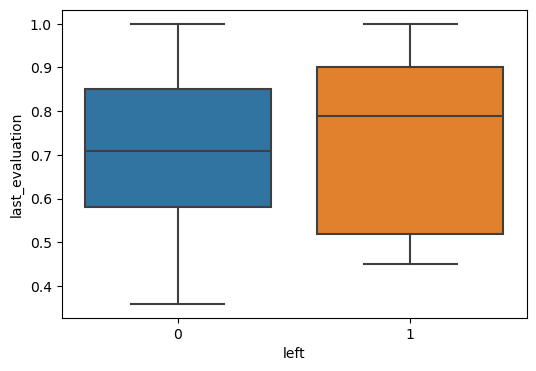

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x=df1['left'], y=df1['last_evaluation'])

In [40]:
last_evaluation_summary = df1.groupby('left').agg({'last_evaluation':'mean'}).reset_index()
last_evaluation_summary.columns = ['left', 'average_last_evaluation']
last_evaluation_summary['left'] = last_evaluation_summary['left'].replace({0: 'Not Left', 1: 'Left'})
last_evaluation_summary

,left,average_last_evaluation
0,Not Left,0.715473
1,Left,0.718113


Text(0, 0.5, 'Average last evaluation')

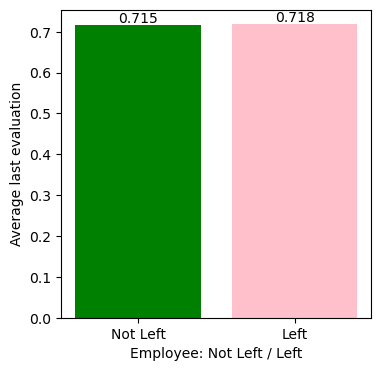

In [50]:
plt.figure(figsize=(4,4))
bar_colors = ['green', 'pink']
bars = plt.bar(last_evaluation_summary['left'], last_evaluation_summary['average_last_evaluation'], color=bar_colors)
for bar in bars:
    plt.annotate(f'{bar.get_height():.3f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0),
                 textcoords='offset points')
plt.xlabel('Employee: Not Left / Left')
plt.ylabel('Average last evaluation')

#### Number project

In [46]:
project_summary = df1.groupby('number_project').agg({'left':['count', 'mean']}).reset_index()
project_summary.columns = ['project', 'employees_count', 'avg_percent_of_employees_left']
project_summary

,project,employees_count,avg_percent_of_employees_left
0,2,2388,0.656198
1,3,4055,0.017756
2,4,4365,0.093700
3,5,2761,0.221659
4,6,1174,0.557922
5,7,256,1.000000


Text(0, 0.5, 'Average percent of employees left')

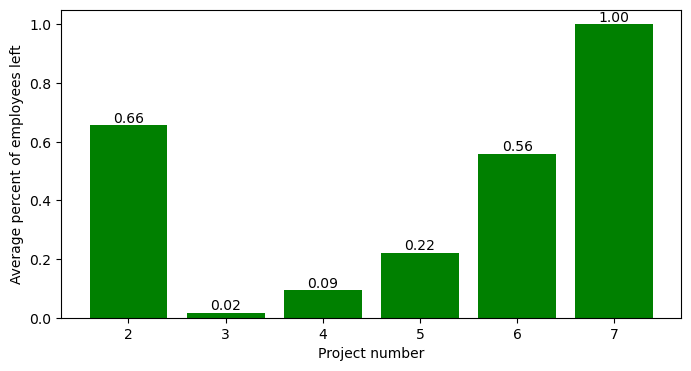

In [51]:
plt.figure(figsize=(8,4))
bars = plt.bar(project_summary['project'], project_summary['avg_percent_of_employees_left'], color='green')
for bar in bars:
    plt.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0),
                 textcoords='offset points')
plt.xlabel('Project number')
plt.ylabel('Average percent of employees left')

#### Average monthly hours:

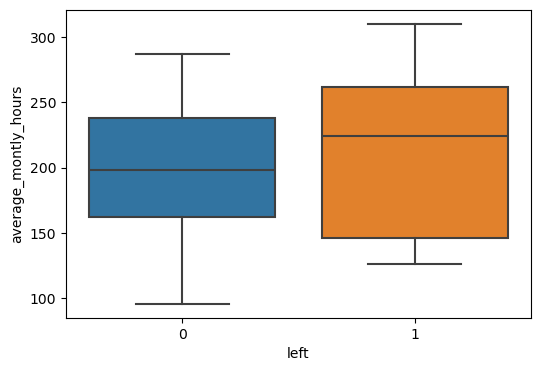

In [52]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x=df1['left'], y=df1['average_montly_hours'])

In [54]:
avg_monthly_hours_summary = df1.groupby('left').agg({'average_montly_hours':'mean'}).reset_index()
avg_monthly_hours_summary.columns = ['left', 'average_monthly_hours']
avg_monthly_hours_summary['left'] = avg_monthly_hours_summary['left'].replace({0: 'Not Left', 1: 'Left'})
avg_monthly_hours_summary

,left,average_monthly_hours
0,Not Left,199.060203
1,Left,207.419210


Text(0, 0.5, 'Average monthly hours')

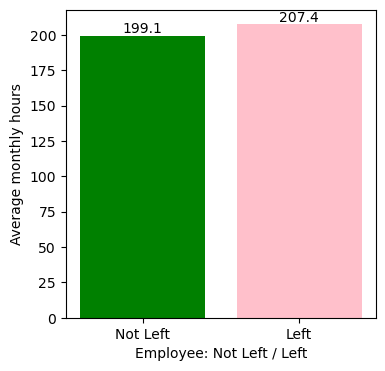

In [56]:
plt.figure(figsize=(4,4))
bar_colors = ['green', 'pink']
bars = plt.bar(avg_monthly_hours_summary['left'], avg_monthly_hours_summary['average_monthly_hours'], color=bar_colors)
for bar in bars:
    plt.annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0),
                 textcoords='offset points')
plt.xlabel('Employee: Not Left / Left')
plt.ylabel('Average monthly hours')

#### Time spend company

In [57]:
df1['time_spend_company'].value_counts()

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

In [60]:
time_spend_summary = df1.groupby('time_spend_company').agg({'left':['count', 'mean']}).reset_index()
time_spend_summary.columns = ['time_spend', 'employees_count', 'avg_percent_of_employees_left']
time_spend_summary

,time_spend,employees_count,avg_percent_of_employees_left
0,2,3244,0.016338
1,3,6443,0.246159
2,4,2557,0.348064
3,5,1473,0.565513
4,6,718,0.291086
5,7,188,0.000000
6,8,162,0.000000
7,10,214,0.000000


Text(0, 0.5, 'Average percent of employees left')

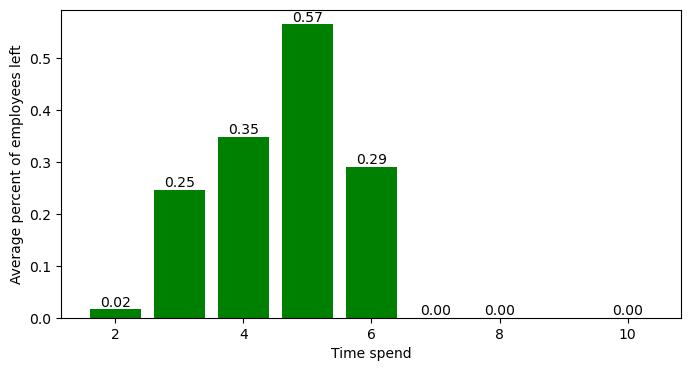

In [64]:
plt.figure(figsize=(8,4))
bars = plt.bar(time_spend_summary['time_spend'], time_spend_summary['avg_percent_of_employees_left'], color='green')
for bar in bars:
    plt.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0),
                 textcoords='offset points')
plt.xlabel('Time spend')
plt.ylabel('Average percent of employees left')

#### Work accident

In [65]:
work_accident_summary = df1.groupby('left').agg({'Work_accident':'mean'}).reset_index()
work_accident_summary.columns = ['left', 'work_accident_level']
work_accident_summary['left'] = work_accident_summary['left'].replace({0: 'Not Left', 1: 'Left'})
work_accident_summary

,left,work_accident_level
0,Not Left,0.175009
1,Left,0.047326


Text(0, 0.5, 'Work accident level')

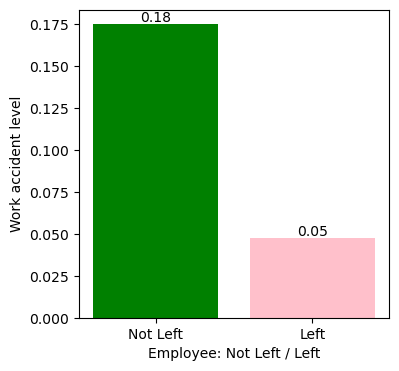

In [67]:
plt.figure(figsize=(4,4))
bar_colors = ['green', 'pink']
bars = plt.bar(work_accident_summary['left'], work_accident_summary['work_accident_level'], color=bar_colors)
for bar in bars:
    plt.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0),
                 textcoords='offset points')
plt.xlabel('Employee: Not Left / Left')
plt.ylabel('Work accident level')

#### Promotion last 5 years

In [68]:
promotion_summary = df1.groupby('left').agg({'promotion_last_5years':'mean'}).reset_index()
promotion_summary.columns = ['left', 'promotion_level']
promotion_summary['left'] = promotion_summary['left'].replace({0: 'Not Left', 1: 'Left'})
promotion_summary

,left,promotion_level
0,Not Left,0.026251
1,Left,0.005321


Text(0, 0.5, 'Promotion rate')

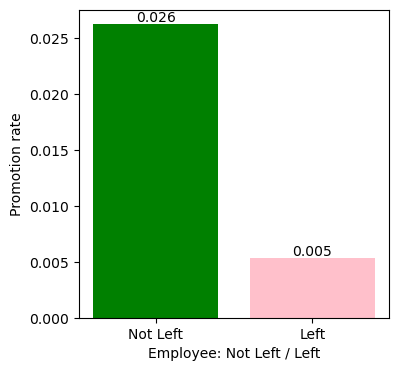

In [69]:
plt.figure(figsize=(4,4))
bar_colors = ['green', 'pink']
bars = plt.bar(promotion_summary['left'], promotion_summary['promotion_level'], color=bar_colors)
for bar in bars:
    plt.annotate(f'{bar.get_height():.3f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0),
                 textcoords='offset points')
plt.xlabel('Employee: Not Left / Left')
plt.ylabel('Promotion rate')

#### Department

In [71]:
df1['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [73]:
department_summary = df1.groupby('Department').agg({'left': ['count', 'mean']}).reset_index()
department_summary.columns = ['department', 'employees_count', 'avg_percent_of_employees_left']
department_summary

,department,employees_count,avg_percent_of_employees_left
0,IT,1227,0.222494
1,RandD,787,0.153748
2,accounting,767,0.265971
3,hr,739,0.290934
4,management,630,0.144444
5,marketing,858,0.236597
6,product_mng,902,0.219512
7,sales,4140,0.244928
8,support,2229,0.248991
9,technical,2720,0.256250


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

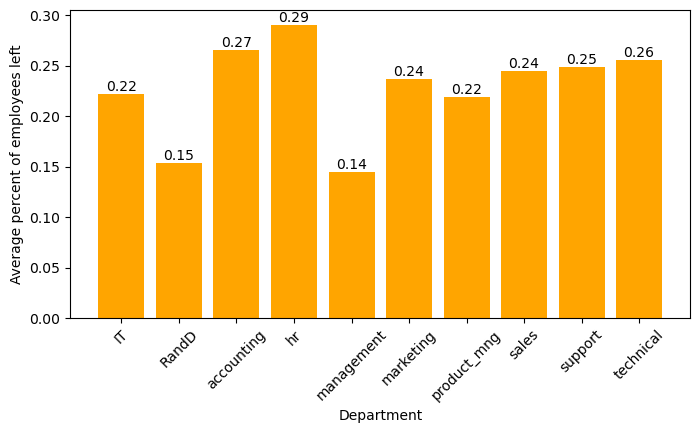

In [80]:
plt.figure(figsize=(8,4))
bars = plt.bar(department_summary['department'], department_summary['avg_percent_of_employees_left'], color='orange')
for bar in bars:
    plt.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0), textcoords='offset points')
plt.xlabel('Department')
plt.ylabel('Average percent of employees left')
plt.xticks(rotation=45)

#### Salary

In [81]:
salary_summary = df1.groupby('salary').agg({'left': ['count', 'mean']}).reset_index()
salary_summary.columns = ['salary_level', 'employees_count', 'avg_percent_of_employees_left']
salary_summary

,salary_level,employees_count,avg_percent_of_employees_left
0,high,1237,0.066289
1,low,7316,0.296884
2,medium,6446,0.204313


Text(0, 0.5, 'Average percent of employees left')

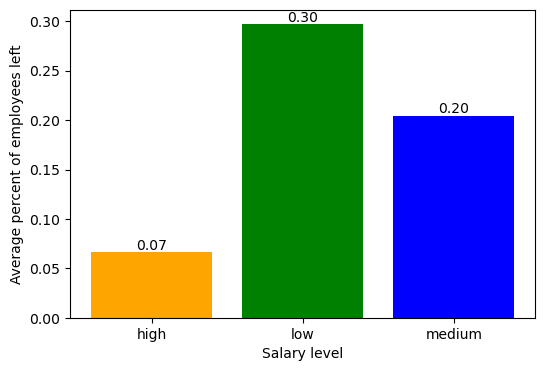

In [86]:
plt.figure(figsize=(6, 4))
bar_colors = ['orange', 'green', 'blue']
bars = plt.bar(salary_summary['salary_level'], salary_summary['avg_percent_of_employees_left'], color=bar_colors)
for bar in bars:
    plt.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0), textcoords='offset points')
plt.xlabel('Salary level')
plt.ylabel('Average percent of employees left')

#### Feature selection

- satisfaction_level  
- number_project  
- time_spend_company  
- Work_accident  
- promotion_last_5years  
- salary

In [104]:
subdf1 = df1[['left', 'satisfaction_level', 'number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]
subdf1.head()

,left,satisfaction_level,number_project,time_spend_company,Work_accident,promotion_last_5years,salary
0,1,0.38,2,3,0,0,low
1,1,0.80,5,6,0,0,medium
2,1,0.11,7,4,0,0,medium
3,1,0.72,5,5,0,0,low
4,1,0.37,2,3,0,0,low


In [103]:
dummies = pd.get_dummies(df1['salary'], dtype=int, prefix='salary')
dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [102]:
merged = pd.concat([subdf1, dummies], axis=1)
merged.head()

,left,satisfaction_level,number_project,time_spend_company,Work_accident,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,1,0.38,2,3,0,0,low,0,1,0
1,1,0.80,5,6,0,0,medium,0,0,1
2,1,0.11,7,4,0,0,medium,0,0,1
3,1,0.72,5,5,0,0,low,0,1,0
4,1,0.37,2,3,0,0,low,0,1,0


In [101]:
final = merged.drop(['salary', 'salary_low'], axis=1)
final.head()

,left,satisfaction_level,number_project,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_medium
0,1,0.38,2,3,0,0,0,0
1,1,0.80,5,6,0,0,0,1
2,1,0.11,7,4,0,0,0,1
3,1,0.72,5,5,0,0,0,0
4,1,0.37,2,3,0,0,0,0


In [100]:
X = final.drop(['left'], axis=1)
X.head()

,satisfaction_level,number_project,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_medium
0,0.38,2,3,0,0,0,0
1,0.80,5,6,0,0,0,1
2,0.11,7,4,0,0,0,1
3,0.72,5,5,0,0,0,0
4,0.37,2,3,0,0,0,0


In [105]:
y = final['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [109]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [111]:
len(X_train)

11999

In [112]:
len(X_test)

3000

In [113]:
model1.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [115]:
model1.score(X_test, y_test)

0.7963333333333333